In [1]:
# import libraries
import torch
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim

In [2]:
# Device configuration
# If GPU available then cuda will work otherwise CPU
# form more details: https://blogs.nvidia.com/blog/2012/09/10/what-is-cuda-2/

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('available device: ',device)

available device:  cuda


In [3]:
# transform data according to model
transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                          torchvision.transforms.Normalize((0.5,), (0.5,))])

In [4]:
# download data
trainset = torchvision.datasets.MNIST('./data', download=True, train=True, transform=transform)
testset = torchvision.datasets.MNIST('./data', download=True, train=False, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
# lode data with batch size
batch_size=64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [6]:
# data description for train data
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [7]:
# data description for train data
dataiter = iter(testloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


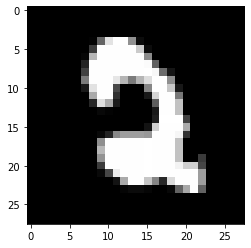

In [9]:
# show one data
plt.imshow(images[0].numpy().squeeze(), cmap='gray')

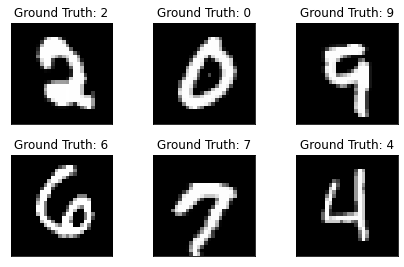

In [10]:
# plot data
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
# fig

In [14]:
# create model
class Net(nn.Module):   
  def __init__(self):
      super(Net, self).__init__()

      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
          # Defining another 2D convolution layer
          nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
      )

      self.linear_layers = nn.Sequential(
          nn.Linear(4 * 7 * 7, 10)
      )

  # Defining the forward pass    
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x

model = Net()
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [16]:
# model set up with optimizer and loss function
learning_rate = 0.01
momentum = 0.5

# defining the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# defining the loss function
criterion = nn.CrossEntropyLoss()

In [17]:
# connect model with CUDA 
model = model.to(device)
criterion = criterion.to(device)

In [19]:
# train the model
epoch = int(input('enter epoch: '))
for i in range(epoch):
    running_loss = 0
    for images, labels in trainloader:

        # connect data with CUDA
        if torch.cuda.is_available():
          images = images.to(device)
          labels = labels.to(device)

        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {}/{} - Training loss: {}".format(i+1, epoch, running_loss/len(trainloader)))

enter epoch: 30
Epoch 1/30 - Training loss: 0.05302679621235235
Epoch 2/30 - Training loss: 0.05312088668960254
Epoch 3/30 - Training loss: 0.0530834130419449
Epoch 4/30 - Training loss: 0.052581388791993276
Epoch 5/30 - Training loss: 0.05212789028659582
Epoch 6/30 - Training loss: 0.05126479103507078
Epoch 7/30 - Training loss: 0.0507490877522531
Epoch 8/30 - Training loss: 0.05042865869119021
Epoch 9/30 - Training loss: 0.05049726107085287
Epoch 10/30 - Training loss: 0.049552315167699465
Epoch 11/30 - Training loss: 0.049955929803755336
Epoch 12/30 - Training loss: 0.048353651559589976
Epoch 13/30 - Training loss: 0.04918031432763435
Epoch 14/30 - Training loss: 0.047841541802022616
Epoch 15/30 - Training loss: 0.04817537323360506
Epoch 16/30 - Training loss: 0.04831263929381962
Epoch 17/30 - Training loss: 0.048039790668111766
Epoch 18/30 - Training loss: 0.04831391009845898
Epoch 19/30 - Training loss: 0.04594825758001279
Epoch 20/30 - Training loss: 0.04645694824557916
Epoch 21/